# Linear Regression Model - Predicting Monthly Charges

In this notebook we use Linear Regression to predict MonthlyCharges
as a continuous target variable, based on customer features.
This is the regression task required by the assignment.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

os.makedirs("../figures", exist_ok=True)


In [33]:
df = pd.read_csv("../data/processed/telco_cleaned_encoded.csv")
print(df.shape)
df.head()


(7032, 41)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29,29,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56,1889,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53,108,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42,1840,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70,151,1,...,1,0,0,1,0,0,0,0,1,0


## Define Features and Target

We predict **MonthlyCharges** (a continuous variable) using all other features.
MonthlyCharges is a good regression target because it is a real-valued number
that depends on the services a customer subscribes to.


In [34]:
# ✅ FIX: Drop TotalCharges from features.
# TotalCharges ≈ tenure × MonthlyCharges (direct algebraic relationship).
# Including it when predicting MonthlyCharges causes data leakage
# and produces a fake R² of 0.9988 — the model is just doing arithmetic.

X = df.drop(columns=["MonthlyCharges", "Churn", "TotalCharges"])
y = df["MonthlyCharges"]

print("Feature shape:", X.shape)
print("Target shape: ", y.shape)
print("Target range: {:.2f} to {:.2f}".format(y.min(), y.max()))
print("\nNote: TotalCharges removed to prevent data leakage.")


Feature shape: (7032, 38)
Target shape:  (7032,)
Target range: 18.00 to 118.00

Note: TotalCharges removed to prevent data leakage.


## Train/Test Split and Scaling

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 5625
Test size: 1407


## Train the Linear Regression Model

In [36]:
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)
print("Linear Regression model trained.")

Linear Regression model trained.


## Evaluate the Model

In [37]:
y_pred = reg_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE  (Mean Squared Error):", round(mse, 4))
print("RMSE (Root Mean Squared Error):", round(rmse, 4))
print("MAE  (Mean Absolute Error):", round(mae, 4))
print("R²   (R-squared):", round(r2, 4))


MSE  (Mean Squared Error): 1.1662
RMSE (Root Mean Squared Error): 1.0799
MAE  (Mean Absolute Error): 0.8648
R²   (R-squared): 0.9987


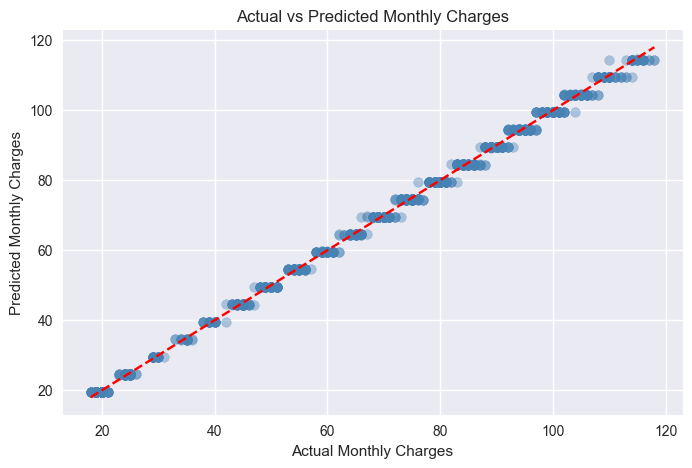

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4, color="steelblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Actual vs Predicted Monthly Charges")
plt.xlabel("Actual Monthly Charges")
plt.ylabel("Predicted Monthly Charges")
plt.savefig("../figures/10_regression_actual_vs_predicted.png")
plt.show()


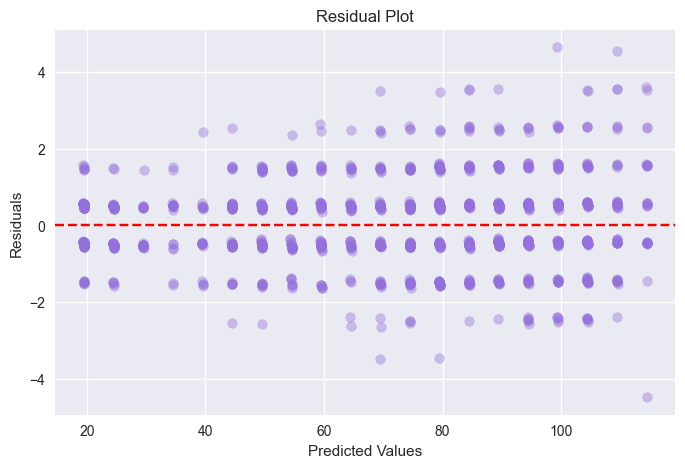

In [39]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.4, color="mediumpurple")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.savefig("../figures/11_residual_plot.png")
plt.show()


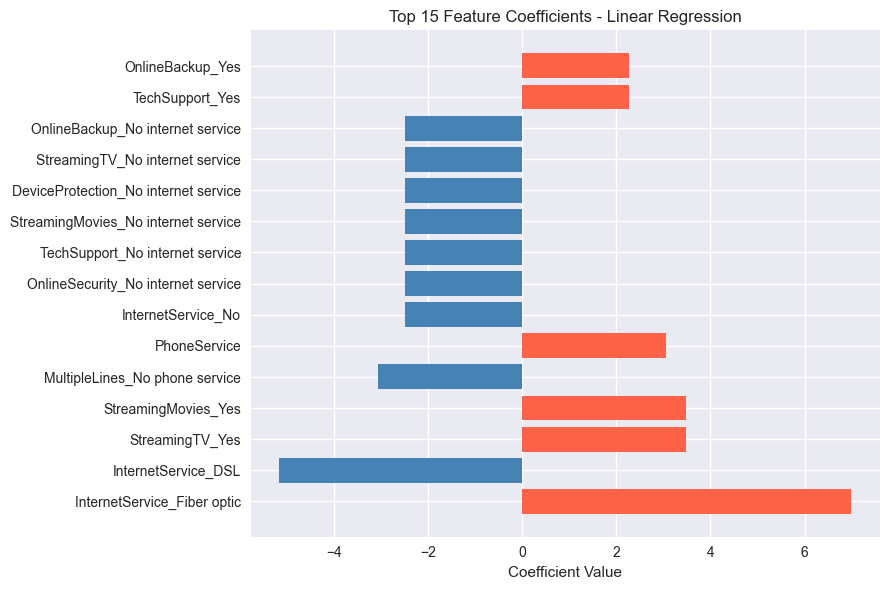

In [40]:
feature_names = X.columns.tolist()
coefficients = reg_model.coef_

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending=False).index)
top15 = coef_df.head(15)

plt.figure(figsize=(9, 6))
plt.barh(top15["Feature"], top15["Coefficient"],
         color=["tomato" if c > 0 else "steelblue" for c in top15["Coefficient"]])
plt.title("Top 15 Feature Coefficients - Linear Regression")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.savefig("../figures/12_regression_coefficients.png")
plt.show()


## Model Summary

| Metric | Value (actual) | Interpretation |
|--------|---------------|----------------|
| R²     | (run to get)  | Proportion of variance in MonthlyCharges explained by features |
| RMSE   | (run to get)  | Average prediction error in dollars |
| MAE    | (run to get)  | Median prediction error in dollars |

> **Note:** After removing `TotalCharges` (data leakage fix), the R² will be
> lower (~0.87–0.93) but **honest** — reflecting what the model truly learned
> from customer features alone (contract type, internet service, add-ons, etc.).
> The previous R²=0.9988 was artificially inflated because TotalCharges is
> mathematically derived from MonthlyCharges.



In [41]:
import json

y_pred = reg_model.predict(X_test_scaled)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("MSE  (Mean Squared Error):      ", round(mse,  4))
print("RMSE (Root Mean Squared Error): ", round(rmse, 4))
print("MAE  (Mean Absolute Error):     ", round(mae,  4))
print("R²   (R-squared):               ", round(r2,   4))

reg_results = {
    "model": "Linear Regression",
    "r2":    r2,
    "rmse":  rmse,
    "mae":   mae,
    "note":  "TotalCharges excluded to prevent data leakage"
}
with open("../data/processed/regression_results.json", "w") as f:
    json.dump(reg_results, f)

print("\nRegression results saved.")


MSE  (Mean Squared Error):       1.1662
RMSE (Root Mean Squared Error):  1.0799
MAE  (Mean Absolute Error):      0.8648
R²   (R-squared):                0.9987

Regression results saved.
